# AtliQ Hospitality Analysis

Introduction:Atliq , a prominent player in the hospitality industry for the past
    two decades, faces challenges in market share and revenue loss due to competition
    and management decisions. To revitalize their position, the managing director seeks
    to integrate "Business and Data Intelligence." However, lacking an in-house analytics
    team, they opt to engage a third-party service provider to derive insights from their
    historical data, aiming to regain their competitive edge.

Problem Statement: Atliq Grands, a renowned player in the hospitality industry with a
    20-year legacy, faces challenges in market share and revenue loss due to competitor
    strategies and management decisions. To counter this, the managing director aims to 
    integrate "Business and Data Intelligence" but lacks an in-house analytics team. 
    Consequently, they opt to engage a third-party service provider to derive insights 
    from their historical data to regain competitiveness.
    

In [1]:
import os
os.chdir('D:/py/')
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df=pd.read_csv('fact_aggregated_bookings.csv')
df1=pd.read_csv('dim_hotels.csv')
df2=pd.read_csv('fact_bookings.csv')
df3=pd.read_csv('dim_date.csv')
df4=pd.read_csv('dim_rooms.csv')


In [3]:
df5 = df1.merge(df, how='right', on='property_id')            # hotels merge aggregated booking 
df5.head(2)

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity
0,16559,Atliq Exotica,Luxury,Mumbai,01-05-2022,RT1,25,30
1,19562,Atliq Bay,Luxury,Bangalore,01-05-2022,RT1,28,30


In [4]:
df6 = df2.merge(df1, how='left', on='property_id')          # fact booking merge hotels
df6.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [5]:
df7 = df2.merge(df, how='left', on='check_in_date')                   #fact aggregates merge fact booking
df7 = df7.rename(columns={'property_id_x': 'property_id'})
df7.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category_x,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_id_y,room_category_y,successful_bookings,capacity
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,3,RT1,direct online,1.0,Checked Out,10010,10010,16559,RT1,25,30
1,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,3,RT1,direct online,1.0,Checked Out,10010,10010,19562,RT1,28,30


In [6]:
df3 = df3.rename(columns={'date': 'check_in_date'})                 #date mrge fact booking
df8 = df3.merge(df2, how='right', on='check_in_date')
df8.head(2)

,check_in_date,mmm yy,week no,day_type,booking_id,property_id,booking_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,01-05-2022,May-22,W 19,weekend,May012216558RT11,16558,27-04-2022,02-05-2022,3,RT1,direct online,1.0,Checked Out,10010,10010
1,01-05-2022,May-22,W 19,weekend,May012216558RT12,16558,30-04-2022,02-05-2022,2,RT1,others,NaN,Cancelled,9100,3640


In [7]:
# df5 EDA

In [8]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9200 entries, 0 to 9199
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_id          9200 non-null   int64 
 1   property_name        9200 non-null   object
 2   category             9200 non-null   object
 3   city                 9200 non-null   object
 4   check_in_date        9200 non-null   object
 5   room_category        9200 non-null   object
 6   successful_bookings  9200 non-null   int64 
 7   capacity             9200 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 646.9+ KB


In [9]:
df5.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9200.000000
mean,18040.640000,14.629348,25.280000
std,1099.818325,7.591770,11.440971
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,43.000000,50.000000


In [10]:
df5.corr()

,property_id,successful_bookings,capacity
property_id,1.000000,0.035876,0.104631
successful_bookings,0.035876,1.000000,0.840521
capacity,0.104631,0.840521,1.000000


In [11]:
df5.nunique()

property_id            25
property_name           7
category                2
city                    4
check_in_date          92
room_category           4
successful_bookings    42
capacity               38
dtype: int64

In [12]:
df5.isna().sum()

property_id            0
property_name          0
category               0
city                   0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [13]:
df5.head()

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity
0,16559,Atliq Exotica,Luxury,Mumbai,01-05-2022,RT1,25,30
1,19562,Atliq Bay,Luxury,Bangalore,01-05-2022,RT1,28,30
2,19563,Atliq Palace,Business,Bangalore,01-05-2022,RT1,23,30
3,17558,Atliq Grands,Luxury,Mumbai,01-05-2022,RT1,13,19
4,16558,Atliq Grands,Luxury,Delhi,01-05-2022,RT1,18,19


In [14]:
df5.tail()

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity
9195,16563,Atliq Palace,Business,Delhi,31-07-2022,RT4,13,18
9196,16559,Atliq Exotica,Luxury,Mumbai,31-07-2022,RT4,13,18
9197,17558,Atliq Grands,Luxury,Mumbai,31-07-2022,RT4,3,6
9198,19563,Atliq Palace,Business,Bangalore,31-07-2022,RT4,3,6
9199,17561,Atliq Blu,Luxury,Mumbai,31-07-2022,RT4,3,4


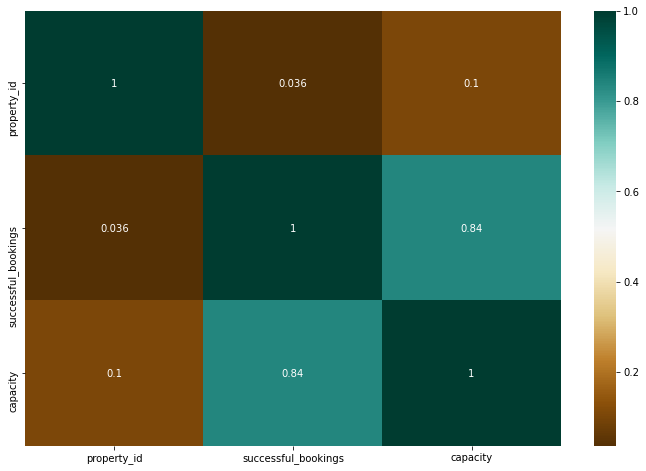

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df5.corr(), cmap='BrBG', annot=True)
plt.show()

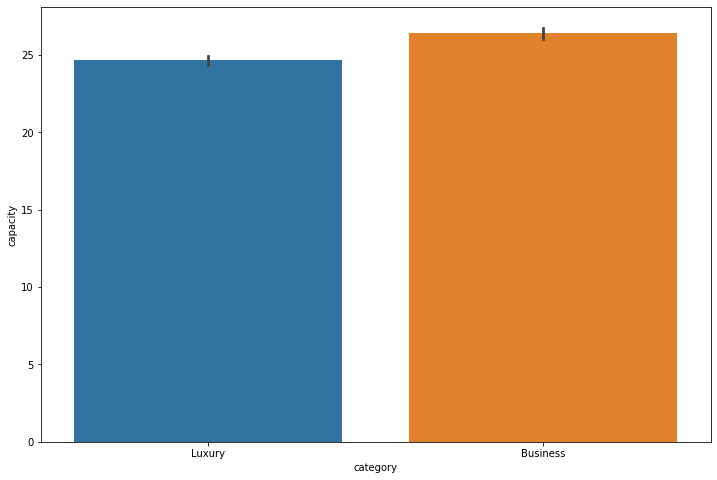

In [16]:
plt.figure(figsize=(12,8))
sns.barplot(x=df5['category'], y=df5['capacity'], estimator=np.mean)
plt.show()

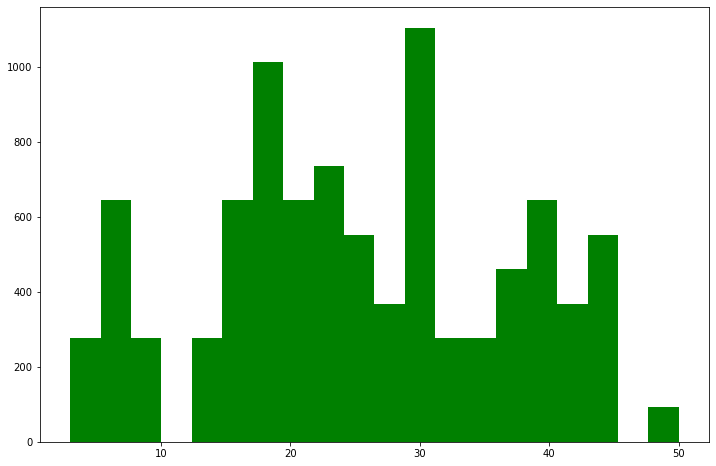

In [17]:
plt.figure(figsize=(12,8))
plt.hist(df5['capacity'], bins=20, color='green' ,histtype='stepfilled',stacked=True )
plt.show()

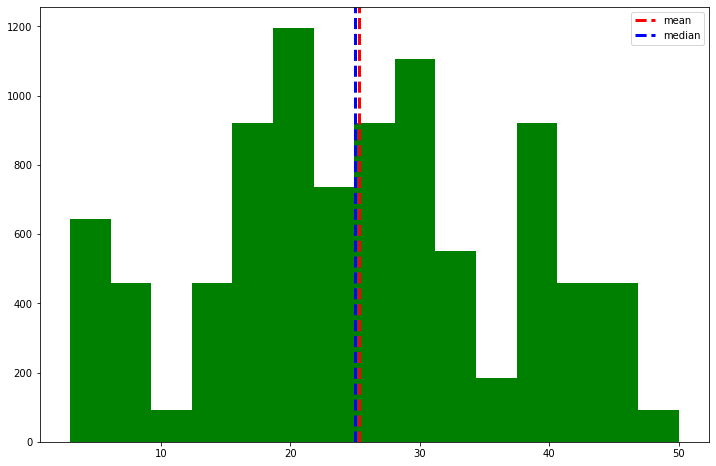

In [18]:
plt.figure(figsize=(12,8))
plt.hist(df5['capacity'], bins=15, color='green' ,histtype='stepfilled',stacked=True )
plt.axvline(df5['capacity'].mean(), color='red', label='mean', linestyle='dashed', linewidth=3)
plt.axvline(df5['capacity'].median(), color='blue', label='median', linestyle='dashed', linewidth=3)
plt.legend()
plt.show()

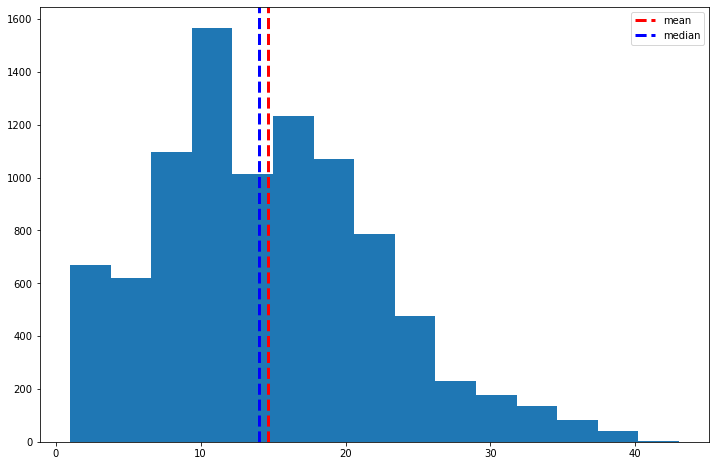

In [19]:
plt.figure(figsize=(12,8))
plt.hist(df5['successful_bookings'], bins=15 ,histtype='stepfilled',stacked=True )
plt.axvline(df5['successful_bookings'].mean(), color='red', label='mean', linestyle='dashed', linewidth=3)
plt.axvline(df5['successful_bookings'].median(), color='blue', label='median', linestyle='dashed', linewidth=3)
plt.legend()
plt.show()

<AxesSubplot:xlabel='category', ylabel='count'>

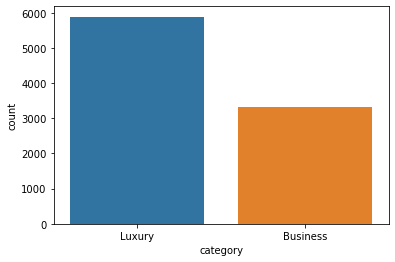

In [21]:
sns.countplot(x=df5['category'])

In [ ]:
sns.pairplot(df5, size=6, height=3.0, palette='viridis')


In [23]:
# df6 EDA

In [24]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134590 entries, 0 to 134589
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
 12  property_name      134590 non-null  object 
 13  category           134590 non-null  object 
 14  city               134590 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 1

In [25]:
df6.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


In [26]:
df6.corr()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
property_id,1.000000,0.011037,-0.115720,-0.125010,-0.100073
no_guests,0.011037,1.000000,-0.003056,0.215558,0.170780
ratings_given,-0.115720,-0.003056,1.000000,0.004179,0.004179
revenue_generated,-0.125010,0.215558,0.004179,1.000000,0.794316
revenue_realized,-0.100073,0.170780,0.004179,0.794316,1.000000


In [27]:
df6.nunique()

booking_id           134590
property_id              25
booking_date            116
check_in_date            92
checkout_date            97
no_guests                 6
room_category             4
booking_platform          7
ratings_given             5
booking_status            3
revenue_generated        62
revenue_realized        124
property_name             7
category                  2
city                      4
dtype: int64

In [28]:
df6.isna().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
property_name            0
category                 0
city                     0
dtype: int64

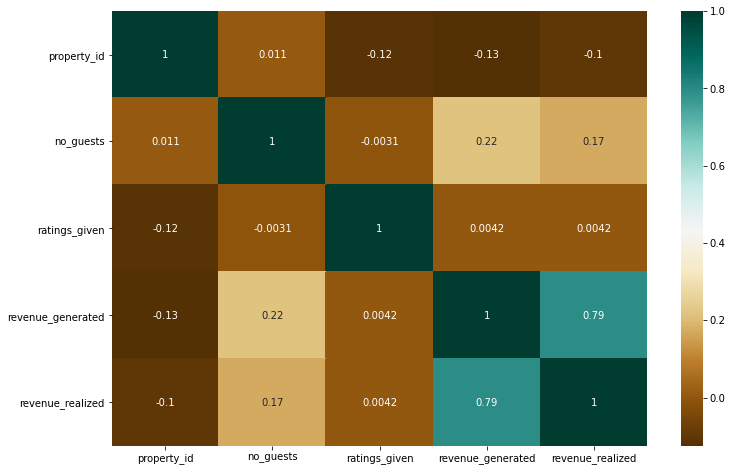

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(df6.corr(), cmap='BrBG', annot=True)
plt.show()

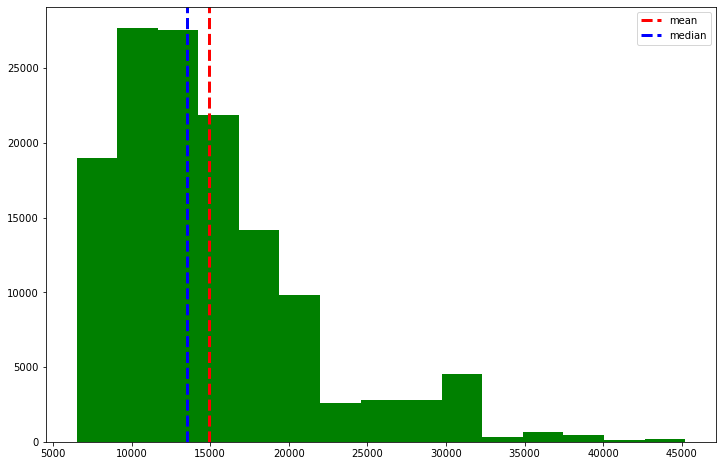

In [30]:
plt.figure(figsize=(12,8))
plt.hist(df6['revenue_generated'], bins=15, color='green' ,histtype='stepfilled',stacked=True )
plt.axvline(df6['revenue_generated'].mean(), color='red', label='mean', linestyle='dashed', linewidth=3)
plt.axvline(df6['revenue_generated'].median(), color='blue', label='median', linestyle='dashed', linewidth=3)
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
plt.pie(df6['ratings_given'], labels=df5['booking_platform'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.show()

plt.figure(figsize=(12,8))
sns.barplot(x=df6['booking_platform'], y=df6['ratings_given'], estimator=np.mean)
plt.show()

<AxesSubplot:xlabel='category', ylabel='count'>

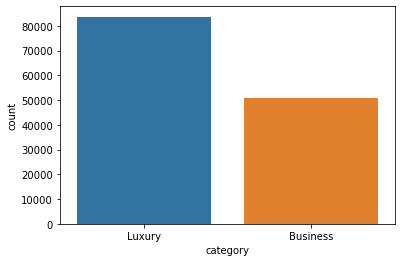

In [31]:
sns.countplot(x=df6['category'])

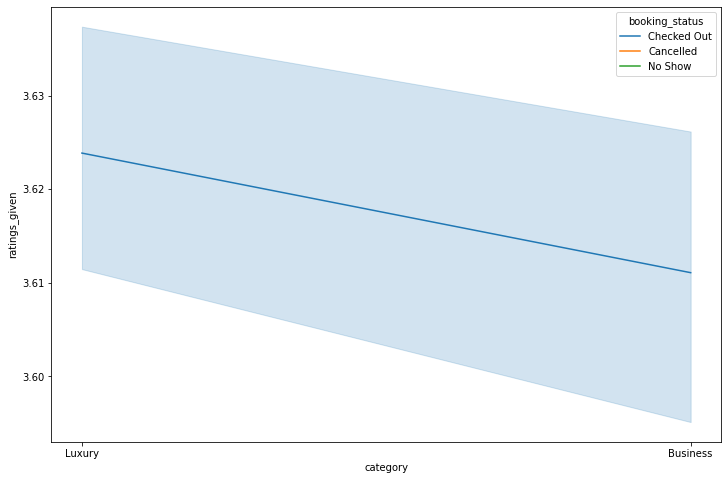

In [32]:
plt.figure(figsize=(12,8))
sns.lineplot(x=df6['category'],y=df6['ratings_given'],hue=df6['booking_status'])
plt.show()

sns.pairplot(df6, size=6, height=3.0, palette='viridis')

In [33]:
# df7 EDA

In [51]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13459000 entries, 0 to 13458999
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   booking_id           object 
 1   property_id          int64  
 2   booking_date         object 
 3   check_in_date        object 
 4   checkout_date        object 
 5   no_guests            int64  
 6   room_category_x      object 
 7   booking_platform     object 
 8   ratings_given        float64
 9   booking_status       object 
 10  revenue_generated    int64  
 11  revenue_realized     int64  
 12  property_id_y        int64  
 13  room_category_y      object 
 14  successful_bookings  int64  
 15  capacity             int64  
dtypes: float64(1), int64(7), object(8)
memory usage: 1.7+ GB


In [ ]:
df7.describe()

In [ ]:
df7.nunique()

In [ ]:
df7.isna().sum()

In [52]:
df7['booking_platform'].value_counts()

others            5506600
makeyourtrip      2689800
logtrip           1475600
direct online     1337900
tripster           963000
journey            810600
direct offline     675500
Name: booking_platform, dtype: int64

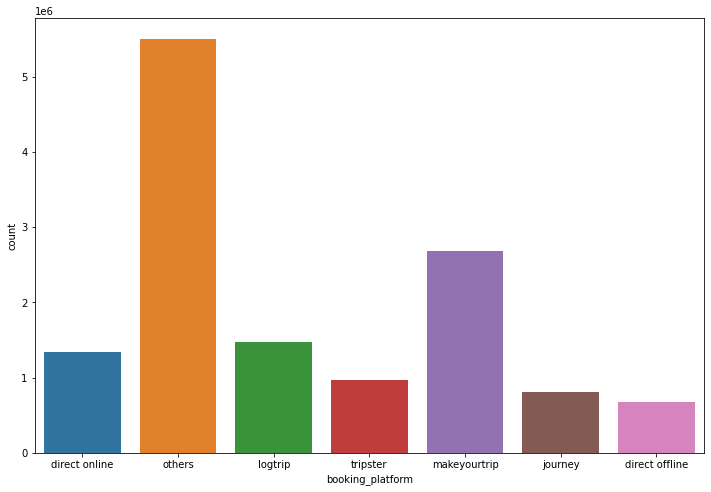

In [62]:
plt.figure(figsize=(12,8))
sns.countplot(x=df7['booking_platform'])
plt.show()

sns.pairplot(df7, size=6, height=3.0, palette='viridis')

In [41]:
# df8 EDA

In [55]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134590 entries, 0 to 134589
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   check_in_date      134590 non-null  object 
 1   mmm yy             134590 non-null  object 
 2   week no            134590 non-null  object 
 3   day_type           134590 non-null  object 
 4   booking_id         134590 non-null  object 
 5   property_id        134590 non-null  int64  
 6   booking_date       134590 non-null  object 
 7   checkout_date      134590 non-null  object 
 8   no_guests          134590 non-null  int64  
 9   room_category      134590 non-null  object 
 10  booking_platform   134590 non-null  object 
 11  ratings_given      56683 non-null   float64
 12  booking_status     134590 non-null  object 
 13  revenue_generated  134590 non-null  int64  
 14  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(10)
memory usage: 1

In [ ]:
df8.describe()

In [ ]:
df8.nunique()

In [ ]:
df8.isna().sum()

In [58]:
df8['ratings_given'].value_counts()

5.0    19480
3.0    17561
4.0     9653
2.0     6452
1.0     3537
Name: ratings_given, dtype: int64

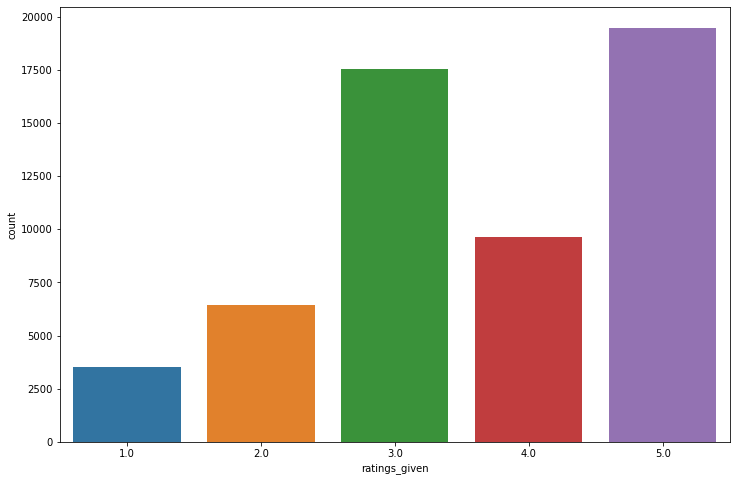

In [61]:
plt.figure(figsize=(12,8))
sns.countplot(x=df8['ratings_given'])
plt.show()

sns.pairplot(df8, size=6, height=3.0, palette='viridis')